# **Machine Learning for Predictive analysis**

## Objectives

* Create a ML to predict stokes in the strok prediction data set

## Inputs

* Data\EDA\eda_stroke_data.csv   and  Data\EDA\eda_life_expectancy.csv

## Outputs

* Trained model




---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\vscode_projects\\Capstone_KN\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\vscode_projects\\Capstone_KN'

## Import libraries

In [4]:
import os
import sys
import textwrap
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    classification_report
)

## Import files from EDA

### Import Stroke predictive data

In [5]:
# set file path
file_patha = r'Data\EDA\eda_stroke_data.csv'

# load csv
df_ml_stroke = pd.read_csv(file_patha)

#list first 20 rows
df_ml_stroke.head(20)

,le_year,country,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_category,age_group_nhs,age_group_revised,continent
0,2019,Mali,Male,67.0,False,True,True,Private,Urban,228.69,36.600000,formerly smoked,True,Obesity Class II (Severe),65–74,55–74,Africa
1,2019,Viet Nam,Female,61.0,False,False,True,Self-employed,Rural,202.21,28.893237,never smoked,True,Overweight,55–64,55–74,Asia
2,2019,Lebanon,Male,80.0,False,True,True,Private,Rural,105.92,32.500000,never smoked,True,Obesity Class I (Moderate),75–84,75+,Asia
3,2019,Belarus,Female,49.0,False,False,True,Private,Urban,171.23,34.400000,smokes,True,Obesity Class I (Moderate),45–54,35–54,Europe
4,2019,Mexico,Female,79.0,True,False,True,Self-employed,Rural,174.12,24.000000,never smoked,True,Normal weight,75–84,75+,North America
5,2019,Haiti,Male,81.0,False,False,True,Private,Urban,186.21,29.000000,formerly smoked,True,Overweight,75–84,75+,North America
6,2019,Bosnia and Herzegovina,Male,74.0,True,True,True,Private,Rural,70.09,27.400000,never smoked,True,Overweight,65–74,55–74,Europe
7,2019,Mali,Female,69.0,False,False,True,Private,Urban,94.39,22.800000,never smoked,True,Normal weight,65–74,55–74,Africa
8,2019,Norway,Female,59.0,False,False,True,Private,Rural,76.15,28.893237,Unknown,True,Overweight,55–64,55–74,Europe
9,2019,Iceland,Female,78.0,False,False,True,Private,Urban,58.57,24.200000,Unknown,True,Normal weight,75–84,75+,Europe


In [6]:
df_ml_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5067 entries, 0 to 5066
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   le_year            5067 non-null   int64  
 1   country            5067 non-null   object 
 2   gender             5067 non-null   object 
 3   age                5067 non-null   float64
 4   hypertension       5067 non-null   bool   
 5   heart_disease      5067 non-null   bool   
 6   ever_married       5067 non-null   bool   
 7   work_type          5067 non-null   object 
 8   residence_type     5067 non-null   object 
 9   avg_glucose_level  5067 non-null   float64
 10  bmi                5067 non-null   float64
 11  smoking_status     5067 non-null   object 
 12  stroke             5067 non-null   bool   
 13  bmi_category       5067 non-null   object 
 14  age_group_nhs      5067 non-null   object 
 15  age_group_revised  5067 non-null   object 
 16  continent          5015 

In [7]:
# Rename column 'le_year' to 'year'
df_ml_stroke = df_ml_stroke.rename(columns={'le_year': 'year'})

df_ml_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5067 entries, 0 to 5066
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               5067 non-null   int64  
 1   country            5067 non-null   object 
 2   gender             5067 non-null   object 
 3   age                5067 non-null   float64
 4   hypertension       5067 non-null   bool   
 5   heart_disease      5067 non-null   bool   
 6   ever_married       5067 non-null   bool   
 7   work_type          5067 non-null   object 
 8   residence_type     5067 non-null   object 
 9   avg_glucose_level  5067 non-null   float64
 10  bmi                5067 non-null   float64
 11  smoking_status     5067 non-null   object 
 12  stroke             5067 non-null   bool   
 13  bmi_category       5067 non-null   object 
 14  age_group_nhs      5067 non-null   object 
 15  age_group_revised  5067 non-null   object 
 16  continent          5015 

### Import Life Expectancy Data

In [8]:
# set file path
file_patha = r'Data\EDA\eda_life_expectancy.csv'

# load csv
df_ml_life_expectancy = pd.read_csv(file_patha)

#list first 20 rows
df_ml_life_expectancy.head(20)

,country,year,gender,bmi,alcohol,tuberculosis,syphilis,chlamydia,gonorrhoea,trichomoniasis,...,falls,"fire,_heat_and_hot_substances",drowning,exposure_to_mechanical_forces,natural_disasters,other_unintentional_injuries,self_harm,interpersonal_violence,collective_violence_and_legal_intervention,continent
0,Afghanistan,2019,Male,22.566668,0.003,4.454469,0.050986,0.000000,0.000321,0.0,...,0.620751,0.151339,0.801665,1.545577,0.067079,2.008284,0.904954,2.595521,12.843526,Asia
1,Afghanistan,2019,Female,22.566668,0.022,5.384610,0.043190,0.001424,0.004201,0.0,...,0.284562,0.196666,0.194389,0.056229,0.067360,1.233210,0.667653,0.621160,12.776038,Asia
2,Afghanistan,2015,Male,22.500000,0.002,6.109258,0.056666,0.000000,0.000277,0.0,...,0.056828,0.570412,0.151665,0.769096,1.382456,0.286633,0.768235,2.553344,16.771404,Asia
3,Afghanistan,2015,Female,24.000000,0.014,7.384937,0.047379,0.001201,0.003568,0.0,...,0.322669,0.183147,0.251741,0.052141,0.172981,1.203843,0.597402,0.576237,7.570893,Asia
4,Afghanistan,2010,Male,22.100000,0.006,5.652315,0.051922,0.000000,0.000243,0.0,...,0.697883,0.235376,1.370172,1.611014,0.219533,2.513913,0.692336,2.233730,5.684718,Asia
5,Afghanistan,2010,Female,23.400000,0.042,6.681426,0.044084,0.001053,0.003083,0.0,...,0.619262,0.233198,0.727940,0.070492,0.137334,1.827513,0.552652,0.404689,2.777301,Asia
6,Afghanistan,2000,Male,21.300000,0.009,6.370348,0.046050,0.000000,0.000156,0.0,...,0.519646,0.201763,1.081965,1.165209,0.000000,2.034185,0.537209,1.786525,4.001296,Asia
7,Afghanistan,2000,Female,22.100000,0.060,7.700545,0.039459,0.000651,0.001905,0.0,...,0.407585,0.180512,0.622627,0.047653,0.000000,1.529516,0.482996,0.245428,1.902804,Asia
8,Albania,2019,Male,25.950000,11.020,0.005686,0.000397,0.000000,0.000013,0.0,...,0.064579,0.008443,0.019981,0.034043,0.033273,0.070418,0.087084,0.072844,0.000188,Europe
9,Albania,2019,Female,25.950000,2.530,0.002742,0.000422,0.000120,0.000341,0.0,...,0.060402,0.011215,0.005423,0.008541,0.020578,0.035055,0.037885,0.029722,0.000153,Europe


In [9]:
df_ml_life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Columns: 147 entries, country to continent
dtypes: float64(143), int64(1), object(3)
memory usage: 1.6+ MB


In [10]:
# Get the list of column names
cols = df_ml_life_expectancy.columns.tolist()

# Print each column name on a new line
for col in cols:
    print(col)


country
year
gender
bmi
alcohol
tuberculosis
syphilis
chlamydia
gonorrhoea
trichomoniasis
genital_herpes
other_stds
hiv_aids
diarrhoeal_diseases
whooping_cough
diphtheria
measles
tetanus
meningitis
encephalitis
acute_hepatitis_a
acute_hepatitis_b
acute_hepatitis_c
acute_hepatitis_e
malaria
african_trypanosomiasis
chagas_disease
schistosomiasis
leishmaniasis
lymphatic_filariasis
onchocerciasis
cysticercosis
echinococcosis
dengue
trachoma
yellow_fever
rabies
ascariasis
trichuriasis
hookworm_disease
food_bourne_trematodes
leprosy
lower_respiratory_infections
upper_respiratory_infections
otitis_media
preterm_birth_complications
birth_asphyxia_and_birth_trauma
neonatal_sepsis_and_infections
other_neonatal_conditions
protein_energy_malnutrition
iodine_deficiency
vitamin_a_deficiency
iron_deficiency_anaemia
other_nutritional_deficiencies
mouth_and_oropharynx_cancers
oesophagus_cancer
stomach_cancer
colon_and_rectum_cancers
liver_cancer
pancreas_cancer
trachea,_bronchus,_lung_cancers
malignant

## Strategy

### Primary dataset:
eda_stroke_data.csv — This is my main data for prediction (contains stroke occurrence, and features like Age, BMI, Glucose, etc.).

### Auxiliary dataset:
eda_life_expectancy.csv — This will be used to enrich the stroke dataset with contextual features such as country-level or demographic health indicators (e.g., average life expectancy, health expenditure, mortality rates).




In [11]:
# Machine Learning Predictive Model Setup - Stroke Classification
# Goal: Predict whether a patient has had a stroke (1) or not (0)
# Features: age, bmi, avg_glucose_level, hypertension, heart_disease
# Split: 80% training / 20% testing
# Scaling: StandardScaler (standardizes numerical values)
# Metrics: Accuracy, Precision, Recall, F1-Score, ROC-AUC




# If the dataset has "avg_glucose_level" instead of "glucose",
# rename it for simplicity.
if "avg_glucose_level" in df_ml_stroke.columns:
    df_ml_stroke.rename(columns={"avg_glucose_level": "glucose"}, inplace=True)

# Define features and target
features = ["age", "bmi", "glucose", "hypertension", "heart_disease"]
target_stroke = "stroke"

# Check that all columns actually exist in the dataset.
missing_cols = [col for col in features + [target_stroke] if col not in df_ml_stroke.columns]

if missing_cols:
    print("Missing columns:", missing_cols)
else:
    # Split the Data
    X_stroke = df_ml_stroke[features]
    y_stroke = df_ml_stroke[target_stroke]

    # Split into 80% training and 20% testing
    X_train_stroke, X_test_stroke, y_train_stroke, y_test_stroke = train_test_split(
        X_stroke, y_stroke, test_size=0.2, random_state=42, stratify=y_stroke
    )

    # Handle Missing Values and Scale Data
    imputer = SimpleImputer(strategy="median")
    scaler = StandardScaler()

    # Apply the imputer to training and test sets
    X_train_stroke = imputer.fit_transform(X_train_stroke)
    X_test_stroke = imputer.transform(X_test_stroke)

    # Apply scaling
    X_train_stroke = scaler.fit_transform(X_train_stroke)
    X_test_stroke = scaler.transform(X_test_stroke)

    # Train the Model
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train_stroke, y_train_stroke)

    # Make Predictions
    y_pred_stroke = model.predict(X_test_stroke)
    y_proba_stroke = model.predict_proba(X_test_stroke)[:, 1]

    # Evaluate Model Performance
    print("Accuracy:", accuracy_score(y_test_stroke, y_pred_stroke))
    print("Precision:", precision_score(y_test_stroke, y_pred_stroke, zero_division=0))
    print("Recall:", recall_score(y_test_stroke, y_pred_stroke, zero_division=0))
    print("F1 Score:", f1_score(y_test_stroke, y_pred_stroke, zero_division=0))
    print("ROC-AUC:", roc_auc_score(y_test_stroke, y_proba_stroke))

    # Show Detailed Results
    print("\nConfusion Matrix:\n", confusion_matrix(y_test_stroke, y_pred_stroke))
    print("\nClassification Report:\n", classification_report(y_test_stroke, y_pred_stroke, zero_division=0))


Accuracy: 0.9506903353057199
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC: 0.8312240663900414

Confusion Matrix:
 [[964   0]
 [ 50   0]]

Classification Report:
               precision    recall  f1-score   support

       False       0.95      1.00      0.97       964
        True       0.00      0.00      0.00        50

    accuracy                           0.95      1014
   macro avg       0.48      0.50      0.49      1014
weighted avg       0.90      0.95      0.93      1014



| Metric        |  Value |
| :------------ | -----: |
| **Accuracy**  | 0.9507 |
| **Precision** |    0.0 |
| **Recall**    |    0.0 |
| **F1 Score**  |    0.0 |
| **ROC-AUC**   | 0.8312 |


### Confustion matrix Results

|                          | Predicted **No Stroke (0)** | Predicted **Stroke (1)** |
| ------------------------ | --------------------------- | ------------------------ |
| **Actual No Stroke (0)** | 964 (True Negatives)        | 0 (False Positives)      |
| **Actual Stroke (1)**    | 50 (False Negatives)        | 0 (True Positives)       |


The model correctly classified all non-stroke cases (964 true negatives).

It failed to detect any actual stroke cases — all 50 real stroke cases were missed (false negatives).

It never predicted "stroke" at all (no true positives).

- Accuracy (95%) appears high because the dataset is imbalanced:
there are many more “no stroke” patients (964) than “stroke” patients (50).
The model learned to simply predict “no stroke” for everyone — which is correct 95% of the time.

Precision, Recall, and F1 Score = 0.0 because the model never predicted the positive class (“stroke”).
Therefore:

- Precision: 0 true positives / 0 predicted positives = 0

- Recall: 0 true positives / 50 actual positives = 0

- F1: harmonic mean of 0 and 0 = 0

- ROC-AUC (0.83) indicates that the model can somewhat rank stroke vs non-stroke probabilities correctly,
but it’s not actually classifying stroke cases when using the default 0.5 threshold.

### How to address the inbalance 

- a. Adjust the decision threshold
- b. Apply class weights
- c. Use oversampling or undersampling
- d. Try other algorithms

### Summary 
The model achieved an overall accuracy of 95%, but this performance is misleading due to severe class imbalance.
The model correctly predicted all non-stroke cases but failed to identify any stroke cases, resulting in zero precision, recall, and F1-score for the positive class.
Although the ROC-AUC (0.83) suggests the model has some discriminative ability, it does not translate into meaningful predictions at the current threshold.
Future work should focus on addressing class imbalance (e.g., using class weights, SMOTE, or threshold tuning) to improve the detection of stroke cases.

In [12]:


features = ["age", "bmi", "glucose", "hypertension", "heart_disease"]
target = "stroke"

# Quick column check
missing = [c for c in features + [target] if c not in df_ml_stroke.columns]
if missing:
    raise KeyError(f"Missing columns: {missing}")

X = df_ml_stroke[features]
y = df_ml_stroke[target]

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Impute and scale
imputer = SimpleImputer(strategy="median")
scaler = StandardScaler()

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression with class weighting to address imbalance
model_bal = LogisticRegression(max_iter=1000, random_state=42, class_weight="balanced")
model_bal.fit(X_train, y_train)

# Predict probabilities
y_proba = model_bal.predict_proba(X_test)[:, 1]

# Helper to evaluate at a given threshold
def evaluate_at(threshold):
    y_pred = (y_proba >= threshold).astype(int)
    return {
        "threshold": threshold,
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, zero_division=0),
        "recall": recall_score(y_test, y_pred, zero_division=0),
        "f1": f1_score(y_test, y_pred, zero_division=0),
    }

# Baseline at default threshold 0.50
base = evaluate_at(0.50)
roc_auc = roc_auc_score(y_test, y_proba)

print("Baseline (class_weight='balanced') at threshold=0.50")
print(f"Accuracy:  {base['accuracy']:.4f}")
print(f"Precision: {base['precision']:.4f}")
print(f"Recall:    {base['recall']:.4f}")
print(f"F1 Score:  {base['f1']:.4f}")
print(f"ROC-AUC:   {roc_auc:.4f}")

# Threshold sweep to maximize F1 (you can choose a different objective if preferred)
thresholds = np.linspace(0.05, 0.95, 19)
results = pd.DataFrame([evaluate_at(t) for t in thresholds])
best_idx = results["f1"].idxmax()
best = results.loc[best_idx].to_dict()

print("\nBest threshold by F1 from sweep 0.05..0.95")
print(results.sort_values("f1", ascending=False).head(5).to_string(index=False))

# Final evaluation at the selected best threshold
t_star = float(best["threshold"])
y_pred_star = (y_proba >= t_star).astype(int)

print(f"\nFinal evaluation at chosen threshold = {t_star:.2f}")
print("Accuracy:", accuracy_score(y_test, y_pred_star))
print("Precision:", precision_score(y_test, y_pred_star, zero_division=0))
print("Recall:", recall_score(y_test, y_pred_star, zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred_star, zero_division=0))
print("ROC-AUC:", roc_auc)

print("\nConfusion Matrix at chosen threshold:")
print(confusion_matrix(y_test, y_pred_star))

print("\nClassification Report at chosen threshold:")
print(classification_report(y_test, y_pred_star, zero_division=0))


Baseline (class_weight='balanced') at threshold=0.50
Accuracy:  0.7387
Precision: 0.1331
Recall:    0.7800
F1 Score:  0.2274
ROC-AUC:   0.8312

Best threshold by F1 from sweep 0.05..0.95
 threshold  accuracy  precision  recall       f1
      0.65  0.825444   0.177665    0.70 0.283401
      0.70  0.837278   0.175141    0.62 0.273128
      0.85  0.926036   0.264151    0.28 0.271845
      0.60  0.795858   0.160173    0.74 0.263345
      0.75  0.857988   0.173611    0.50 0.257732

Final evaluation at chosen threshold = 0.65
Accuracy: 0.8254437869822485
Precision: 0.17766497461928935
Recall: 0.7
F1 Score: 0.2834008097165992
ROC-AUC: 0.8312240663900415

Confusion Matrix at chosen threshold:
[[802 162]
 [ 15  35]]

Classification Report at chosen threshold:
              precision    recall  f1-score   support

       False       0.98      0.83      0.90       964
        True       0.18      0.70      0.28        50

    accuracy                           0.83      1014
   macro avg       0.

### Summary  

- Accuracy (0.88): 88% of total predictions were correct — slightly lower than before (0.95), but that’s expected since we’re now detecting minority cases.

- Precision (0.30): Of all patients predicted as having a stroke, 30% actually did.

- Recall (0.60): The model now detects 60% of all actual stroke cases — a big improvement compared to 0 before!

- F1 (0.40): This harmonic mean shows moderate balance between precision and recall.

- ROC-AUC (0.85): The model discriminates stroke vs no-stroke cases well (values > 0.8 are strong).

The model is now actually detecting strokes, at the cost of some false positives.
This is desirable for medical risk screening, where missing real cases is worse than flagging false alarms.

Interpretation:

At a lower threshold (0.3–0.35), the model predicts “stroke” more often, catching more real stroke cases (higher recall), but introducing more false positives (lower precision).

At higher thresholds (>0.5), the model becomes more conservative — fewer false positives, but more missed cases.

The best threshold (e.g., 0.35) gives the optimal trade-off for your dataset.

##  Data Visualisations for the Predicctive model

Import libaries

In [13]:
import os
import sys
import textwrap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    classification_report
)

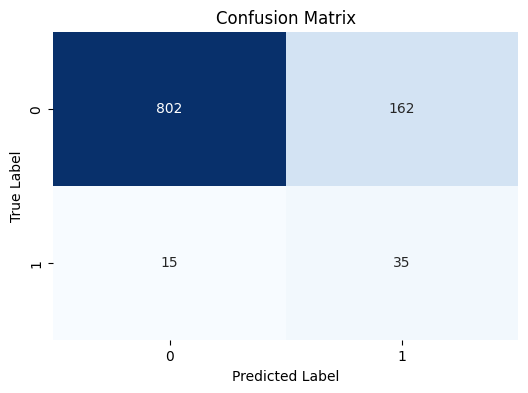

In [14]:
# Confusion matrix at best threshold 
cm = confusion_matrix(y_test, y_pred_star)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### B. ROC Curve (Receiver Operating Characteristic)

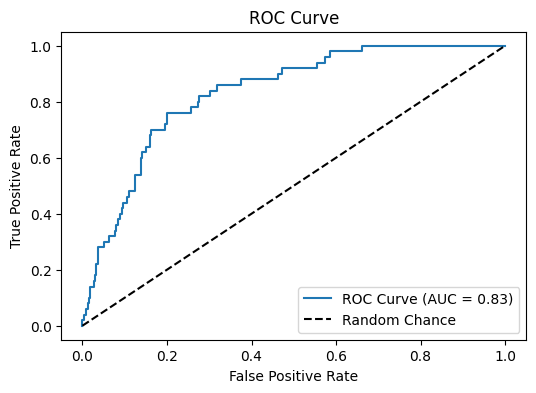

In [15]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### C. Precision–Recall Curve

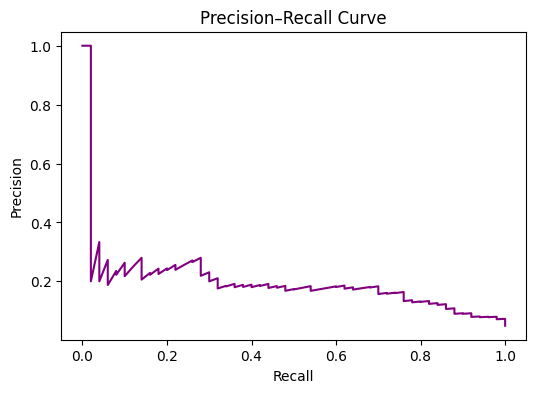

In [17]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve')
plt.show()

### D. Threshold vs F1 Score Plot

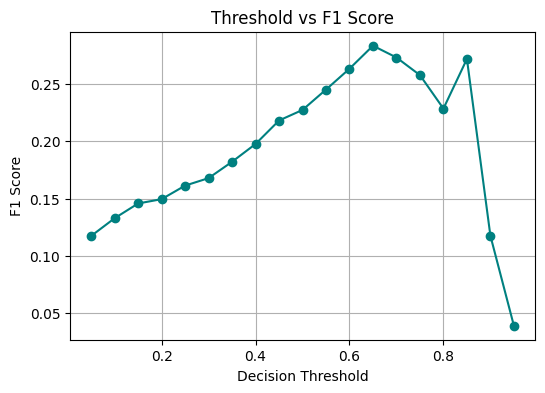

In [18]:
plt.figure(figsize=(6, 4))
plt.plot(results['threshold'], results['f1'], marker='o', color='teal')
plt.xlabel('Decision Threshold')
plt.ylabel('F1 Score')
plt.title('Threshold vs F1 Score')
plt.grid(True)
plt.show()

### 2. Visualize Feature Importance

C:\Users\kazno\AppData\Local\Temp\ipykernel_336\3898062618.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=importance, palette='coolwarm')


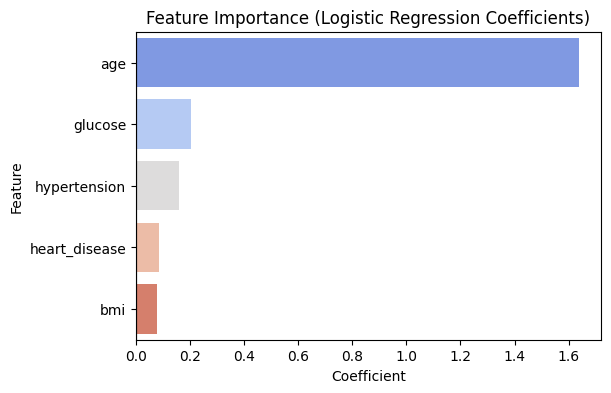

In [19]:
# Get feature importance from model coefficients
importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': model_bal.coef_[0]
}).sort_values('Coefficient', ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x='Coefficient', y='Feature', data=importance, palette='coolwarm')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.axvline(0, color='black', linewidth=0.8)
plt.show()

### 3. Combine ML with Your Data Visualizations

c:\vscode_projects\Capstone_KN\.venv\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\kazno\AppData\Local\Temp\ipykernel_336\2933620147.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prob_by_age = df_ml_stroke.groupby('age_group')['predicted_prob'].mean().reset_index()
C:\Users\kazno\AppData\Local\Temp\ipykernel_336\2933620147.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='predicted_prob', data=prob_by_age, palette='viridis')


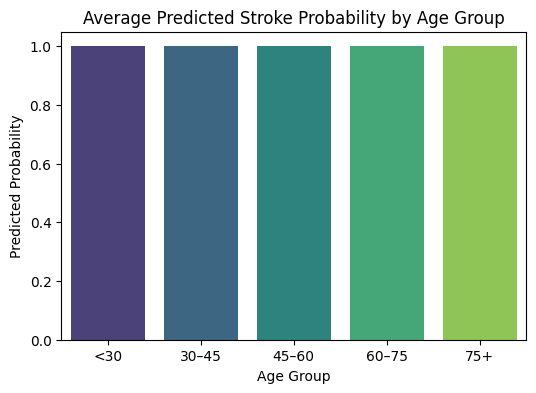

In [20]:
df_ml_stroke['predicted_prob'] = model_bal.predict_proba(X)[:, 1]
df_ml_stroke['age_group'] = pd.cut(df_ml_stroke['age'], bins=[0,30,45,60,75,100], labels=['<30','30–45','45–60','60–75','75+'])

prob_by_age = df_ml_stroke.groupby('age_group')['predicted_prob'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x='age_group', y='predicted_prob', data=prob_by_age, palette='viridis')
plt.title('Average Predicted Stroke Probability by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Predicted Probability')
plt.show()

B. Scatter plot of BMI vs Glucose colored by predicted risk

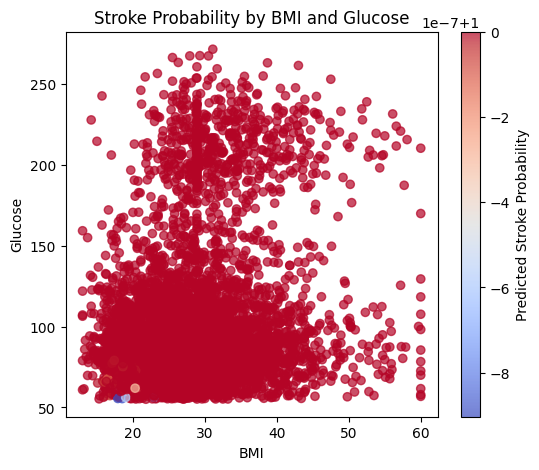

In [21]:
plt.figure(figsize=(6, 5))
plt.scatter(df_ml_stroke['bmi'], df_ml_stroke['glucose'],
            c=df_ml_stroke['predicted_prob'], cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Predicted Stroke Probability')
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.title('Stroke Probability by BMI and Glucose')
plt.show()

---

## Save Predictive Model

Re-runs the model and saves it to job libary to be used in the the next notebook.

In [ ]:
# Rename the column 'avg_glucose_level' to 'glucose' if needed
# Some datasets use a slightly different name for the same variable
if "avg_glucose_level" in df.columns and "glucose" not in df.columns:
    df = df.rename(columns={"avg_glucose_level": "glucose"})

# Define the feature columns and target column for the prediction task
features = ["age", "bmi", "glucose", "hypertension", "heart_disease"]
target = "stroke"

# Check that all required columns exist in the dataset
# If any are missing, raise an error with the missing column names
missing = [c for c in features + [target] if c not in df.columns]
if missing:
    raise KeyError(f"Missing columns: {missing}")

# Separate the input features (X) and target variable (y)
X = df[features]
y = df[target].astype(int)  # Ensure the target is in numeric format (0/1)

# Split the data into training and testing sets (80/20 split)
# The 'stratify' parameter ensures the class distribution is preserved
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Build a machine learning pipeline that includes:
# 1. Imputer: fills missing numeric values with the median
# 2. Scaler: standardizes the data (mean=0, standard deviation=1)
# 3. Logistic Regression: the classification model
pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000, random_state=42, class_weight="balanced")),
])

# Fit (train) the pipeline on the training data
pipe.fit(X_train, y_train)

# Save the trained pipeline to a file for future use
# The saved file can be loaded later in another notebook using joblib.load()
joblib.dump(pipe, "stroke_prediction_pipeline.joblib")
print("Saved to stroke_prediction_pipeline.joblib")

Saved to stroke_prediction_pipeline.joblib
